#Libraries

In [1]:
#Google credentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pysal
!pip install contextily
!pip install geopandas fiona pyogrio

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import libpysal
import contextily as cx

#Average Provision Shop Lifespan


Map out how successful old (and live) shops are in terms of in correlation to proximity to HDB flats

<br>

Summary:

* Average Lifespan of Terminated Provision Shops is **9.2**
* Average Lifespan of Currently Live Provision Shops is **20.8**
* Average Lifespan of All Provision Shops is **11.3**

Most shops throughout history have now been terminated. The number of terminated shops (4519) throughout the last 4 decades vastly outnumber the number of currently live shops (656). These live shops make up only 14.5% of the total number of stores that opened from the 1980s until now. Although it seems that business in this line of work is difficult, the successful ones have the lifespan of over 2 decades.


In [4]:
shops_nlive_path = '/content/drive/MyDrive/Mamak Stores/qgis/live_atm/mm_all_nlive_tdates.csv'
mm_all_nlive = pd.read_csv(shops_nlive_path)

shops_live_path = '/content/drive/MyDrive/Mamak Stores/ACRA data/mm_2025_live_geo.csv'
mm_all_live = pd.read_csv(shops_live_path)

In [5]:
mm_all_live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   uen                                656 non-null    object 
 1   issuance_agency_id                 656 non-null    object 
 2   entity_name                        656 non-null    object 
 3   entity_type_description            656 non-null    object 
 4   business_constitution_description  656 non-null    object 
 5   company_type_description           656 non-null    object 
 6   paf_constitution_description       656 non-null    object 
 7   entity_status_description          656 non-null    object 
 8   registration_incorporation_date    656 non-null    object 
 9   uen_issue_date                     656 non-null    object 
 10  address_type                       656 non-null    object 
 11  block                              656 non-null    object 

In [6]:
mm_all_nlive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4519 entries, 0 to 4518
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   uen                                4519 non-null   object 
 1   issuance_agency_id                 4519 non-null   object 
 2   entity_name                        4519 non-null   object 
 3   entity_type_description            4519 non-null   object 
 4   business_constitution_description  4519 non-null   object 
 5   company_type_description           4519 non-null   object 
 6   paf_constitution_description       4519 non-null   object 
 7   entity_status_description          4519 non-null   object 
 8   registration_incorporation_date    4519 non-null   object 
 9   uen_issue_date                     4519 non-null   object 
 10  address_type                       4519 non-null   object 
 11  block                              4519 non-null   objec

###Average Lifespan of Terminated Provision Shops

In [7]:
mm_all_nlive['shop_lifespan'] = mm_all_nlive['termination_year'] - mm_all_nlive['registration_year']
mm_all_nlive.loc[mm_all_nlive['shop_lifespan'] <= 0, 'shop_lifespan'] = None

avg_shop_lifespan_nlive = np.mean(mm_all_nlive['shop_lifespan'])
print('Average Lifespan of TERMINATED Provision Shops: {}'.format(round(avg_shop_lifespan_nlive,1)))

Average Lifespan of TERMINATED Provision Shops: 9.2


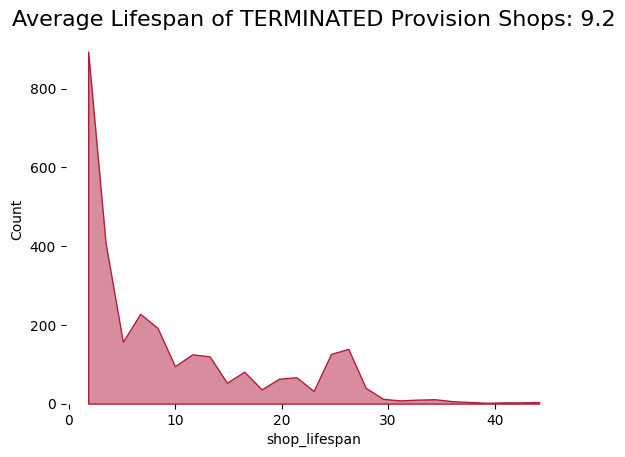

In [8]:
sns.histplot(mm_all_nlive, x='shop_lifespan', color='#b21d3a', element="poly", alpha=0.5)

plt.title(f'Average Lifespan of TERMINATED Provision Shops: {round(avg_shop_lifespan_nlive,1)}', fontsize=16)

spine_list = ['top', 'right', 'left', 'bottom']

for i in spine_list:
  plt.gca().spines[i].set_visible(False)

###Average Lifespan of Live Provision Shops

In [9]:
mm_all_live['registration_incorporation_date'] = pd.to_datetime(mm_all_live['registration_incorporation_date'], errors='coerce')

mm_all_live['registration_year'] = mm_all_live['registration_incorporation_date'].dt.year

mm_all_live['shop_lifespan'] = 2025 - mm_all_live['registration_year']
mm_all_live.loc[mm_all_live['shop_lifespan'] <= 0, 'shop_lifespan'] = None

avg_shop_lifespan_live = np.mean(mm_all_live['shop_lifespan'])
print('Average Lifespan of LIVE Provision Shops: {}'.format(round(avg_shop_lifespan_live,1)))

Average Lifespan of LIVE Provision Shops: 20.8


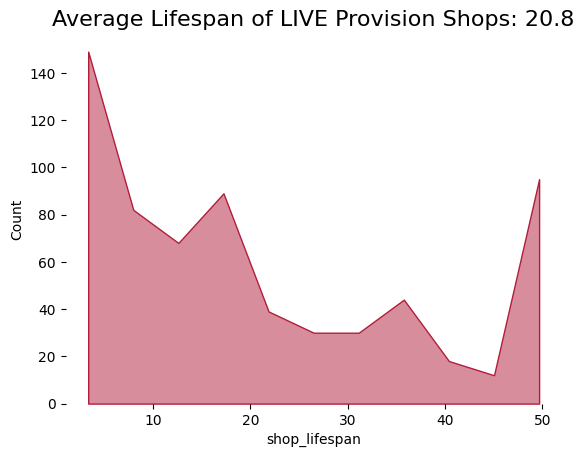

In [10]:
sns.histplot(mm_all_live, x='shop_lifespan', color='#b21d3a', element="poly", alpha=0.5)

plt.title(f'Average Lifespan of LIVE Provision Shops: {round(avg_shop_lifespan_live,1)}', fontsize=16)

spine_list = ['top', 'right', 'left', 'bottom']

for i in spine_list:
  plt.gca().spines[i].set_visible(False)

In [11]:
mm_all = pd.concat([mm_all_live, mm_all_nlive])

mm_all = mm_all.reset_index(drop=True)

avg_lifespan_all = np.mean(mm_all['shop_lifespan'])
print('Average Lifespan of TERMINATED Provision Shops: {}'.format(round(avg_lifespan_all,1)))

Average Lifespan of TERMINATED Provision Shops: 11.3


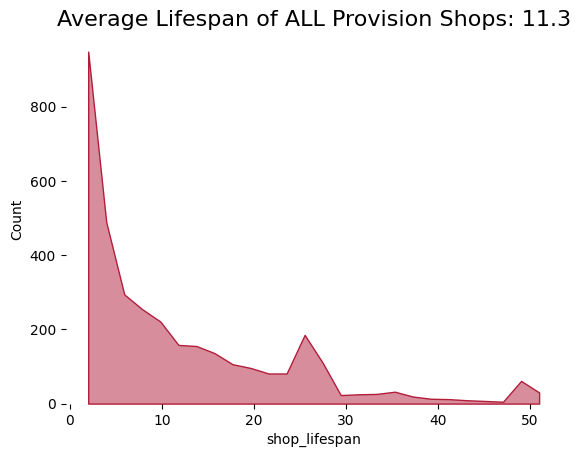

In [12]:
sns.histplot(mm_all, x='shop_lifespan', color='#b21d3a', element="poly", alpha=0.5)

plt.title(f'Average Lifespan of ALL Provision Shops: {round(avg_lifespan_all,1)}', fontsize=16)

spine_list = ['top', 'right', 'left', 'bottom']

for i in spine_list:
  plt.gca().spines[i].set_visible(False)

In [13]:
mm_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   uen                                5175 non-null   object 
 1   issuance_agency_id                 5175 non-null   object 
 2   entity_name                        5175 non-null   object 
 3   entity_type_description            5175 non-null   object 
 4   business_constitution_description  5175 non-null   object 
 5   company_type_description           5175 non-null   object 
 6   paf_constitution_description       5175 non-null   object 
 7   entity_status_description          5175 non-null   object 
 8   registration_incorporation_date    5175 non-null   object 
 9   uen_issue_date                     5175 non-null   object 
 10  address_type                       5175 non-null   object 
 11  block                              5175 non-null   objec

#Count for Registration and Termination

We also want to understand if there are any events in recent history that may be correlated to the decreasing survivability or if there are trends that match with the declining mamak shops.

Most stores closed around the end of the early 2000s (2008), which was marked by the Great Recession in 2008. Most of the data that indicated this termination year was retrieved from the online business directories based on ACRA Bizfiles. However, this information should be taken with a grain of salt as these directories update periodically as explained in Part 4.

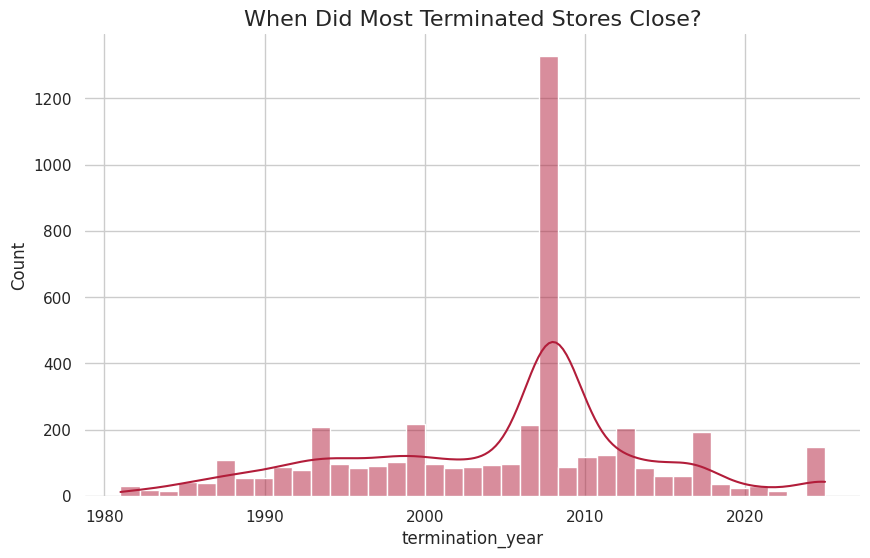

In [64]:
sns.histplot(data=mm_all_nlive, x='termination_year', color='#b21d3a', kde=True)

plt.title('When Did Most Terminated Stores Close?', fontsize=16)

spine_list = ['top', 'right', 'left', 'bottom']

for i in spine_list:
  plt.gca().spines[i].set_visible(False)

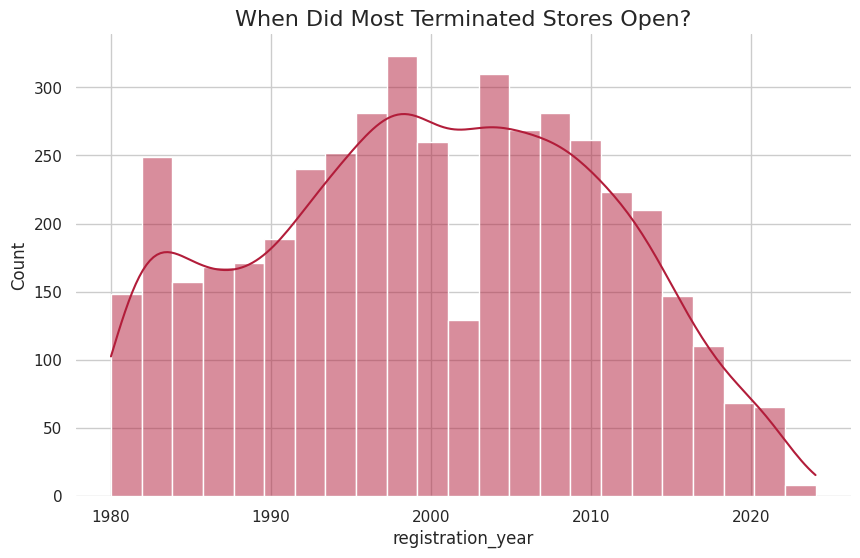

In [65]:
sns.histplot(data=mm_all_nlive, x='registration_year', color='#b21d3a', kde=True)

plt.title('When Did Most Terminated Stores Open?', fontsize=16)

spine_list = ['top', 'right', 'left', 'bottom']

for i in spine_list:
  plt.gca().spines[i].set_visible(False)

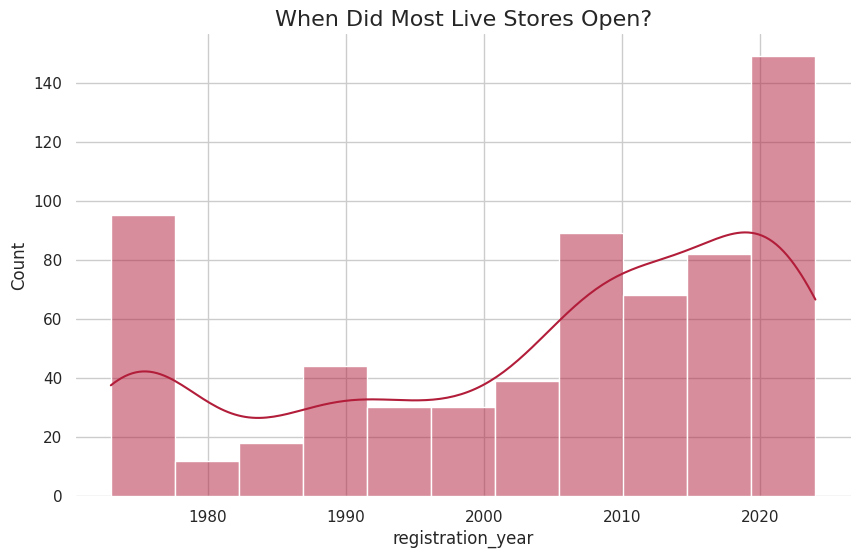

In [66]:
sns.histplot(data=mm_all_live, x='registration_year', color='#b21d3a',kde=True)

plt.title('When Did Most Live Stores Open?', fontsize=16)

spine_list = ['top', 'right', 'left', 'bottom']

for i in spine_list:
  plt.gca().spines[i].set_visible(False)

After the late 2000s, the number of new shops opening each year is steadily declining.

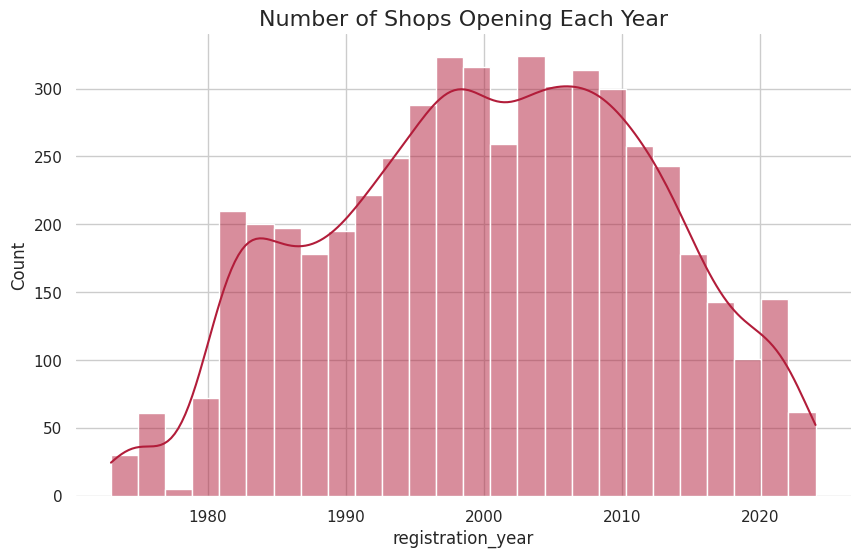

In [67]:
sns.histplot(data=mm_all, x='registration_year', color='#b21d3a',kde=True)

plt.title('Number of Shops Opening Each Year', fontsize=16)

spine_list = ['top', 'right', 'left', 'bottom']

for i in spine_list:
  plt.gca().spines[i].set_visible(False)

#Rate of Shop Closure

In [18]:
base_path = "/content/drive/MyDrive/Mamak Stores/ACRA data/"

decades = ["1980s", "1990s", "2000s", "2010s", "2020s"]

mamaks_geo = {decade: pd.read_csv(f"{base_path}mamaks_{decade}.csv") for decade in decades}

all_reg_1980s = mamaks_geo["1980s"]
all_reg_1990s = mamaks_geo["1990s"]
all_reg_2000s = mamaks_geo["2000s"]
all_reg_2010s = mamaks_geo["2010s"]
all_reg_2020s = mamaks_geo["2020s"]

In [19]:
closure_rate = pd.DataFrame({'decade': ['1980s', '1990s', '2000s', '2010s', '2020s']})
closure_rate.head()

,decade
0,1980s
1,1990s
2,2000s
3,2010s
4,2020s


In [20]:
def num_term_shops(y1, y2):
  reg_temp_df = mm_all_nlive[(mm_all_nlive['termination_year'] >= y1) & (mm_all_nlive['termination_year'] < y2)]
  num_shops = reg_temp_df.shape[0]
  return num_shops

In [21]:
list_shop_df = [all_reg_1980s, all_reg_1990s, all_reg_2000s, all_reg_2010s, all_reg_2020s]

for i in range(closure_rate.shape[0]):
  closure_rate.loc[i, 'registered'] = list_shop_df[i].shape[0]


list_decades = [1980, 1990, 2000, 2010, 2020]

for j, decade in enumerate(list_decades):
    end_year = 2025 if j == len(list_decades) - 1 else list_decades[j + 1]
    closure_rate.loc[j, 'terminated'] = num_term_shops(decade, end_year)

In [22]:
closure_rate['closure_rate'] = closure_rate['terminated']/closure_rate['registered']

In [23]:
closure_rate.head()

,decade,registered,terminated,closure_rate
0,1980s,940.0,308.0,0.327660
1,1990s,1361.0,933.0,0.685525
2,2000s,1499.0,2176.0,1.451634
3,2010s,1011.0,881.0,0.871414
4,2020s,264.0,77.0,0.291667


###Number of New Shops and Terminated Shops per Decade

As the decades passed, the ratio of terminated shops over new shops opening per decade (closure rate of shops) is steadily increasing, with the 2000s being the highest. The number of shops in the 2000s was higher than the number of new shops opening, and hence has the highest closure rate. Although, this visual representation is not the best, it puts new shops opening and terminating rates into perspective by putting them side by side.

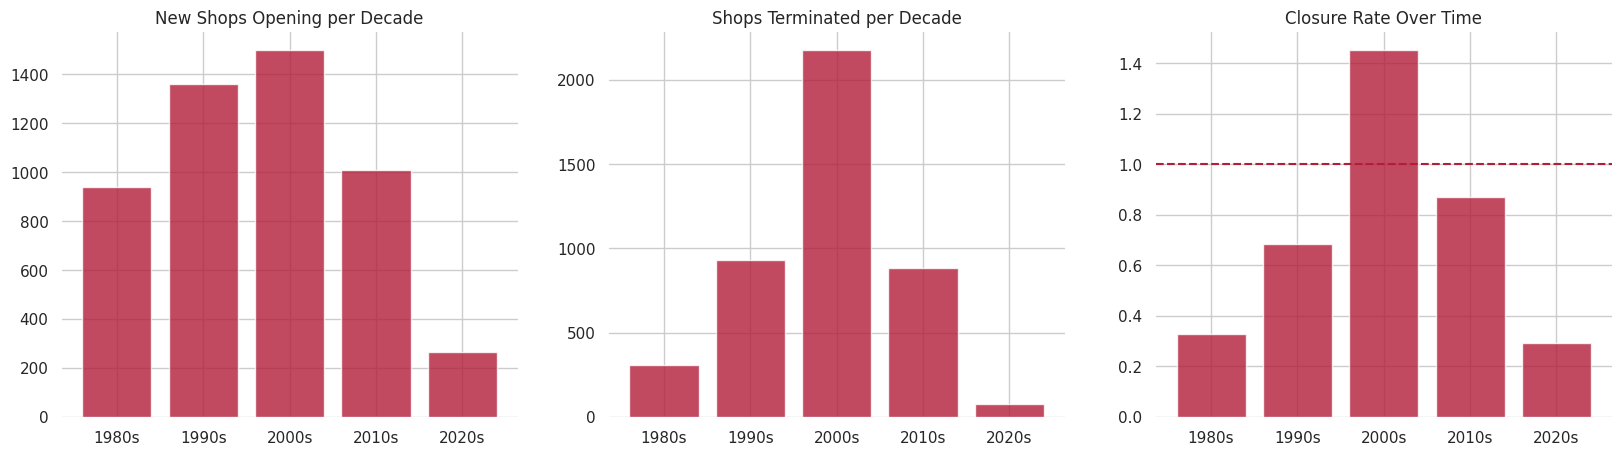

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

#Plot 1
axes[0].bar(closure_rate['decade'], closure_rate['registered'], color='#b21d3a', alpha=0.8)
axes[0].set_title("New Shops Opening per Decade")

#Plot 2
axes[1].bar(closure_rate['decade'], closure_rate['terminated'], color='#b21d3a', alpha=0.8)
axes[1].set_title("Shops Terminated per Decade")

#Plot 3
axes[2].bar(closure_rate['decade'], closure_rate['closure_rate'], color='#b21d3a', alpha=0.8)
axes[2].set_title("Closure Rate Over Time")
axes[2].axhline(1.0, color='#b21d3a', linestyle='dashed')

for ax in axes:
    ax.grid(True)
    ax.set_facecolor("none")
    for spine in ax.spines.values():
        spine.set_visible(False)

#plt.tight_layout()
plt.show()


###Ratio of New Openings and Termination

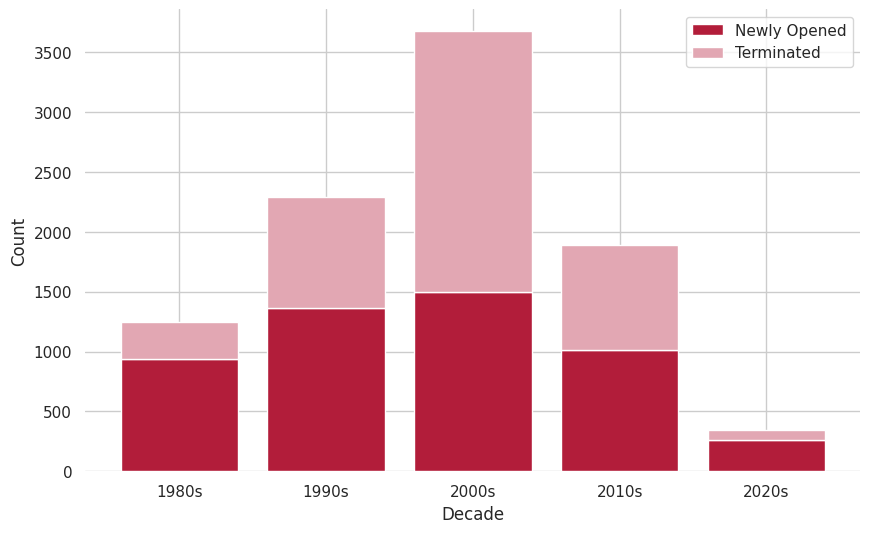

In [62]:
plt.bar(closure_rate['decade'], closure_rate['registered'], color='#b21d3a', label='Newly Opened', alpha=1)
plt.bar(closure_rate['decade'], closure_rate['terminated'], bottom=closure_rate['registered'], color='#e2a7b3', label='Terminated', alpha=1)


plt.xlabel("Decade")
plt.ylabel("Count")


plt.grid(True)

spine_list = ['top', 'right', 'left', 'bottom']

for i in spine_list:
  plt.gca().spines[i].set_visible(False)

plt.legend()

plt.show()

#Live Shops vs Terminated Shops per Decade

This section makes a stacked chart of the analysed information. What proportion of stores...

* ...Just opened in each decade?
* ...Were terminated during or by the end of each decade?
* ...That already existed and will survive the decade?

In [26]:
base_path = "/content/drive/MyDrive/Mamak Stores/qgis/Timelapse Map num_stores/"

decades = ["1980s", "1990s", "2000s", "2010s", "2020s"]

mamaks_geo = {decade: pd.read_csv(f"{base_path}{decade}.csv") for decade in decades}

mm_live_atm_1980s = mamaks_geo["1980s"]
mm_live_atm_1990s = mamaks_geo["1990s"]
mm_live_atm_2000s = mamaks_geo["2000s"]
mm_live_atm_2010s = mamaks_geo["2010s"]
mm_live_atm_2020s = mamaks_geo["2020s"]

In [27]:
mm_live_atm_list = [mm_live_atm_1980s, mm_live_atm_1990s, mm_live_atm_2000s, mm_live_atm_2010s, mm_live_atm_2020s]

for i, mm in enumerate(mm_live_atm_list):
    mm_live_atm_list
    mm_live_atm_list[i] = mm.drop_duplicates(subset=['Add_lat','Add_lon'])

In [28]:
def num_store_count(yr, df):
    for y in range(closure_rate.shape[0]):
        if yr == closure_rate.loc[y, 'decade']:
            closure_rate.loc[y, 'num_stores'] = df.shape[0]
    return closure_rate

closure_rate = num_store_count('1980s', mm_live_atm_1980s)
closure_rate = num_store_count('1990s', mm_live_atm_1990s)
closure_rate = num_store_count('2000s', mm_live_atm_2000s)
closure_rate = num_store_count('2010s', mm_live_atm_2010s)
closure_rate = num_store_count('2020s', mm_live_atm_2020s)

closure_rate.head()

,decade,registered,terminated,closure_rate,num_stores
0,1980s,940.0,308.0,0.327660,2303.0
1,1990s,1361.0,933.0,0.685525,3158.0
2,2000s,1499.0,2176.0,1.451634,1850.0
3,2010s,1011.0,881.0,0.871414,1257.0
4,2020s,264.0,77.0,0.291667,871.0


In [29]:
def num_term_shops(y1, y2):
  reg_temp_df = mm_all_nlive[(mm_all_nlive['termination_year'] >= y1) & (mm_all_nlive['termination_year'] < y2)]
  num_shops = reg_temp_df.shape[0]
  return num_shops

In [30]:
list_decades = [1980, 1990, 2000, 2010, 2020]

for j, decade in enumerate(list_decades):
    end_year = 2025 if j == len(list_decades) - 1 else list_decades[j + 1]
    closure_rate.loc[j, 'terminated'] = num_term_shops(decade, end_year)

In [31]:
closure_rate.head()

,decade,registered,terminated,closure_rate,num_stores
0,1980s,940.0,308.0,0.327660,2303.0
1,1990s,1361.0,933.0,0.685525,3158.0
2,2000s,1499.0,2176.0,1.451634,1850.0
3,2010s,1011.0,881.0,0.871414,1257.0
4,2020s,264.0,77.0,0.291667,871.0


In [32]:
closure_rate['surv_stores'] = closure_rate['num_stores'] - closure_rate['registered']

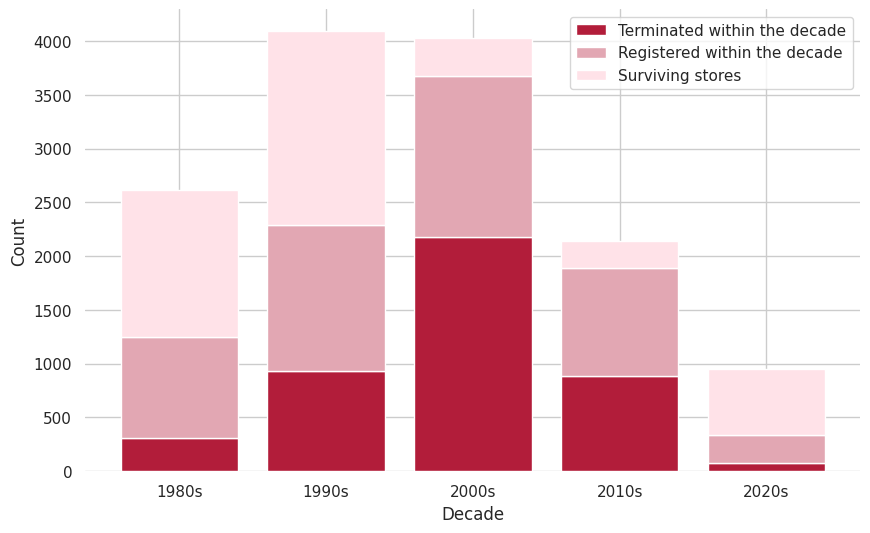

In [61]:
plt.bar(closure_rate['decade'], closure_rate['terminated'], color='#b21d3a', alpha=1, label='Terminated within the decade')
plt.bar(closure_rate['decade'], closure_rate['registered'], bottom=closure_rate['terminated'], color='#e2a7b3', alpha=1, label='Registered within the decade')
plt.bar(closure_rate['decade'], closure_rate['surv_stores'], bottom=closure_rate['registered'] + closure_rate['terminated'], color='#ffe2e8', alpha=1, label='Surviving stores')

plt.xlabel("Decade")
plt.ylabel("Count")

plt.grid(True)


spine_list = ['top', 'right', 'left', 'bottom']
for i in spine_list:
    plt.gca().spines[i].set_visible(False)


plt.legend()

plt.show()


In [34]:
mm_1980s = mm_all[(mm_all['registration_year'] >= 1980) & (mm_all['registration_year'] < 1990)].copy()
mm_1990s = mm_all[(mm_all['registration_year'] >= 1990) & (mm_all['registration_year'] < 2000)].copy()
mm_2000s = mm_all[(mm_all['registration_year'] >= 2000) & (mm_all['registration_year'] < 2010)].copy()
mm_2010s = mm_all[(mm_all['registration_year'] >= 2010) & (mm_all['registration_year'] < 2020)].copy()
mm_2020s = mm_all[(mm_all['registration_year'] >= 2020) & (mm_all['registration_year'] < 2025)].copy()

In [35]:
mm_df_list = [mm_1980s, mm_1990s, mm_2000s, mm_2010s, mm_2020s]



def omit_shop_lifespan(df):
    #mask = df['shop_lifespan'].isna()
    #df.loc[mask, 'shop_lifespan'] = df.loc[mask, 'termination_year'] - df.loc[mask, 'registration_year']
    neg_index_list = df[df['shop_lifespan']<0].index
    for i in neg_index_list:
      df.loc[i,'shop_lifespan'] = np.nan
    return df

In [36]:
for i, df in enumerate(mm_df_list):
  mm_df_list[i] = omit_shop_lifespan(df)

In [37]:
mm_2010s

,uen,issuance_agency_id,entity_name,entity_type_description,business_constitution_description,company_type_description,paf_constitution_description,entity_status_description,registration_incorporation_date,uen_issue_date,...,primary_user_described_activity,secondary_ssic_code,secondary_ssic_description,secondary_user_described_activity,registration_year,Address,Add_lat,Add_lon,shop_lifespan,termination_year
5,53183027J,ACRA,WAFER MART,Business,Sole Proprietor,na,na,Live,2011-01-08 00:00:00,2011-01-10,...,"A CONVENIENCE STORE THAT SELLS FOOD, BEVERAGES...",NaN,na,"A CONVENIENCE STORE THAT SELLS FOOD, BEVERAGES...",2011,60 WOODLANDS IND PARK D STREET 2 SINGAPORE 738406,1.438323,103.767290,14.0,NaN
6,53184605M,ACRA,WEE WEE MART,Business,Partnership,na,na,Live,2011-02-01 00:00:00,2011-02-02,...,"MINIMART, CONVENIENCE STORE AND PROVISION SHOP",NaN,na,"MINIMART, CONVENIENCE STORE AND PROVISION SHOP",2011,538 ANG MO KIO AVENUE 5 #01-4020 CHENG SAN VIE...,1.375542,103.853380,14.0,NaN
7,53202855D,ACRA,WIRACHAI TRADING,Business,Sole Proprietor,na,na,Live,2011-11-06 00:00:00,2011-11-07,...,MINI MART,NaN,na,MINI MART,2011,200 JALAN SULTAN #01-16A TEXTILE CENTRE SINGAP...,1.304174,103.861357,14.0,NaN
8,53309148M,ACRA,WENG WENG TRADING,Business,Sole Proprietor,na,na,Live,2015-06-23 00:00:00,2015-06-24,...,na,NaN,na,na,2015,201C TAMPINES STREET 21 #01-10 SINGAPORE 523201,1.352943,103.953029,10.0,NaN
9,53380541D,ACRA,WEALTHY BUD TRADING,Business,Sole Proprietor,na,na,Live,2018-04-19 00:00:00,2018-04-19,...,GENERAL TRADING,NaN,na,GENERAL TRADING,2018,111 NORTH BRIDGE ROAD #01-37 PENINSULA PLAZA S...,1.292341,103.850883,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,53349910X,ACRA,E2 PROVISION SHOP,Business,Sole Proprietor,na,na,Ceased Registration,2016-11-08,2016-11-08,...,na,NaN,na,na,2016,1 WOODLANDS INDUSTRIAL PARK E2 #01-01 NORDIX S...,1.447788,103.793434,3.0,2019.0
5056,53354352E,ACRA,EE VENDING,Business,Sole Proprietor,na,na,Cancelled (Non-Renewal),2017-01-14,2017-01-14,...,PUT VENDING MACHINE AT VARIOUS LOCATION DISPEN...,NaN,na,PUT VENDING MACHINE AT VARIOUS LOCATION DISPEN...,2017,1 WEST COAST WALK #24-01 THE PARC CONDOMINIUM ...,1.309404,103.760865,NaN,2014.0
5057,53372032W,ACRA,E PUI MINIMART,Business,Sole Proprietor,na,na,Cancelled (Non-Renewal),2017-10-16,2017-10-16,...,na,NaN,na,na,2017,5001 BEACH ROAD #03-64G GOLDEN MILE COMPLEX SI...,1.299508,103.859277,NaN,2014.0
5058,53398829B,ACRA,EZYDEAL TRADING,Business,Sole Proprietor,na,na,Cancelled (Non-Renewal),2019-06-06,2019-06-06,...,na,NaN,na,na,2019,107 JALAN RAJAH #01-K1 RAJAH COURT SINGAPORE 3...,1.327789,103.855045,NaN,2014.0


In [38]:
decades = ['1980s', '1990s', '2000s', '2010s', '2020s']

for i, d in enumerate(decades):
    avg_life = mm_df_list[i]['shop_lifespan'].mean(skipna=True)
    closure_rate.loc[closure_rate['decade'] == d, 'avg_lifespan'] = avg_life

In [39]:
closure_rate.head()

,decade,registered,terminated,closure_rate,num_stores,surv_stores,avg_lifespan
0,1980s,940.0,308.0,0.327660,2303.0,1363.0,17.019860
1,1990s,1361.0,933.0,0.685525,3158.0,1797.0,10.740119
2,2000s,1499.0,2176.0,1.451634,1850.0,351.0,6.776398
3,2010s,1011.0,881.0,0.871414,1257.0,246.0,6.325328
4,2020s,264.0,77.0,0.291667,871.0,607.0,2.777174


#Average Lifespan of Non-live Stores per Decade

In [40]:
def sep_by_decade(y1, y2):
  reg_temp_df = mm_all_nlive[(mm_all_nlive['registration_year'] >= y1) & (mm_all_nlive['registration_year'] < y2)]
  return reg_temp_df

In [41]:
mm_nlive_1980s = sep_by_decade(1980, 1990)
mm_nlive_1990s = sep_by_decade(1990, 2000)
mm_nlive_2000s = sep_by_decade(2000, 2010)
mm_nlive_2010s = sep_by_decade(2010, 2020)
mm_nlive_2020s = sep_by_decade(2020, 2025)

In [42]:
mm_nlive_list = [mm_nlive_1980s, mm_nlive_1990s, mm_nlive_2000s, mm_nlive_2010s, mm_nlive_2020s]

for i in range(len(mm_nlive_list)):
  closure_rate.loc[i, "nlive_lifespan"] = mm_nlive_list[i]["shop_lifespan"].mean()

In [43]:
closure_rate.head()

,decade,registered,terminated,closure_rate,num_stores,surv_stores,avg_lifespan,nlive_lifespan
0,1980s,940.0,308.0,0.327660,2303.0,1363.0,17.019860,15.725587
1,1990s,1361.0,933.0,0.685525,3158.0,1797.0,10.740119,9.110043
2,2000s,1499.0,2176.0,1.451634,1850.0,351.0,6.776398,5.070755
3,2010s,1011.0,881.0,0.871414,1257.0,246.0,6.325328,3.952055
4,2020s,264.0,77.0,0.291667,871.0,607.0,2.777174,2.228571


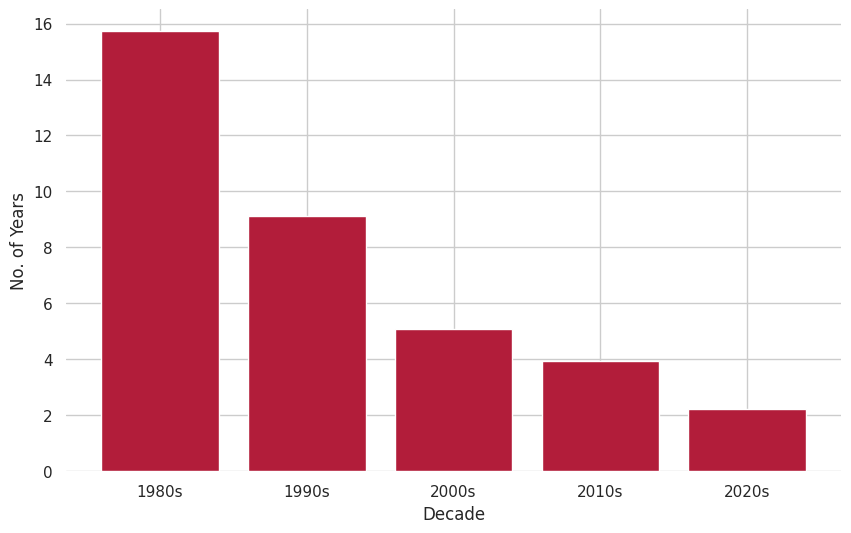

In [63]:
plt.bar(closure_rate['decade'], closure_rate['nlive_lifespan'], color='#b21d3a', alpha=1)
plt.xlabel("Decade")
plt.ylabel("No. of Years")

plt.grid(True)

spine_list = ['top', 'right', 'left', 'bottom']

for i in spine_list:
  plt.gca().spines[i].set_visible(False)

plt.show()

#Current Demographics

In [45]:
#Set style
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

In [46]:
mamakstores_path = '/content/drive/MyDrive/Mamak Stores/qgis/sgdem_gdf/sgdem_gdf_19042025_ANALYSIS.shp'
dem_mm_gdf_og = gpd.read_file(mamakstores_path)

In [47]:
dem_mm_gdf_og.head()

,PLN_AREA_N,Region,Avg_age,Hsg_age,Avg_inc,num_hdb,num_stores,num_conv,num_spmkts,num_nlive,geometry
0,ANG MO KIO,NORTH-EAST,47.484500,52.0,5454.548239,451.0,29.0,58.0,12.0,169.0,"POLYGON Z ((103.85721 1.39654 0, 103.85731 1.3..."
1,BEDOK,EAST,43.193455,62.0,6117.352421,631.0,44.0,66.0,33.0,308.0,"POLYGON Z ((103.93209 1.30545 0, 103.932 1.305..."
2,BISHAN,CENTRAL,42.301983,43.0,7029.053833,279.0,12.0,27.0,8.0,102.0,"POLYGON Z ((103.84297 1.36429 0, 103.84297 1.3..."
3,BOON LAY,WEST,0.000000,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,"POLYGON Z ((103.72042 1.32824 0, 103.72003 1.3..."
4,BUKIT BATOK,WEST,46.080116,50.0,5686.224563,519.0,23.0,118.0,15.0,224.0,"POLYGON Z ((103.76408 1.37001 0, 103.76444 1.3..."


In [48]:
dem_mm_gdf_og['hdb_density'] = dem_mm_gdf_og['num_hdb']/dem_mm_gdf_og['geometry'].area

/tmp/ipython-input-205475589.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dem_mm_gdf_og['hdb_density'] = dem_mm_gdf_og['num_hdb']/dem_mm_gdf_og['geometry'].area


In [49]:
dem_mm_gdf = dem_mm_gdf_og[['Avg_age', 'Avg_inc', 'Hsg_age', 'num_hdb', 'num_stores', 'num_conv', 'num_spmkts', 'num_nlive', 'hdb_density']]

In [50]:
dem_mm_gdf = dem_mm_gdf[
    (dem_mm_gdf['Avg_age'] != 0) &
    (dem_mm_gdf['Avg_inc'] != 0) &
    (dem_mm_gdf['Hsg_age'] != 0)
]

dem_mm_gdf = dem_mm_gdf.reset_index(drop=True)

In [51]:
dem_mm_gdf['num_reg'] = dem_mm_gdf['num_stores']+dem_mm_gdf['num_nlive']

In [52]:
dem_mm_gdf

,Avg_age,Avg_inc,Hsg_age,num_hdb,num_stores,num_conv,num_spmkts,num_nlive,hdb_density,num_reg
0,47.484500,5454.548239,52.0,451.0,29.0,58.0,12.0,169.0,3.980485e+05,198.0
1,43.193455,6117.352421,62.0,631.0,44.0,66.0,33.0,308.0,3.572762e+05,352.0
2,42.301983,7029.053833,43.0,279.0,12.0,27.0,8.0,102.0,4.512678e+05,114.0
3,46.080116,5686.224563,50.0,519.0,23.0,118.0,15.0,224.0,5.733015e+05,247.0
4,47.457681,6083.433185,75.0,567.0,24.0,45.0,19.0,181.0,4.825023e+05,205.0
5,45.936875,5402.699548,42.0,434.0,13.0,26.0,11.0,94.0,5.920953e+05,107.0
6,45.620798,5312.742209,48.0,647.0,24.0,53.0,13.0,127.0,1.301510e+06,151.0
7,46.977933,6721.692506,51.0,258.0,18.0,21.0,16.0,127.0,3.334544e+05,145.0
8,51.245283,9776.488010,65.0,3.0,10.0,50.0,14.0,168.0,7.262155e+03,178.0
9,47.435841,5540.984008,62.0,365.0,33.0,49.0,25.0,256.0,4.657074e+05,289.0


In [53]:
columns = ['Avg_age', 'Avg_inc', 'Hsg_age', 'num_hdb', 'num_stores', 'num_conv', 'num_spmkts', 'num_nlive', 'hdb_density']

#Pairwise Correlations Between Current Live Stores and Current Demographics

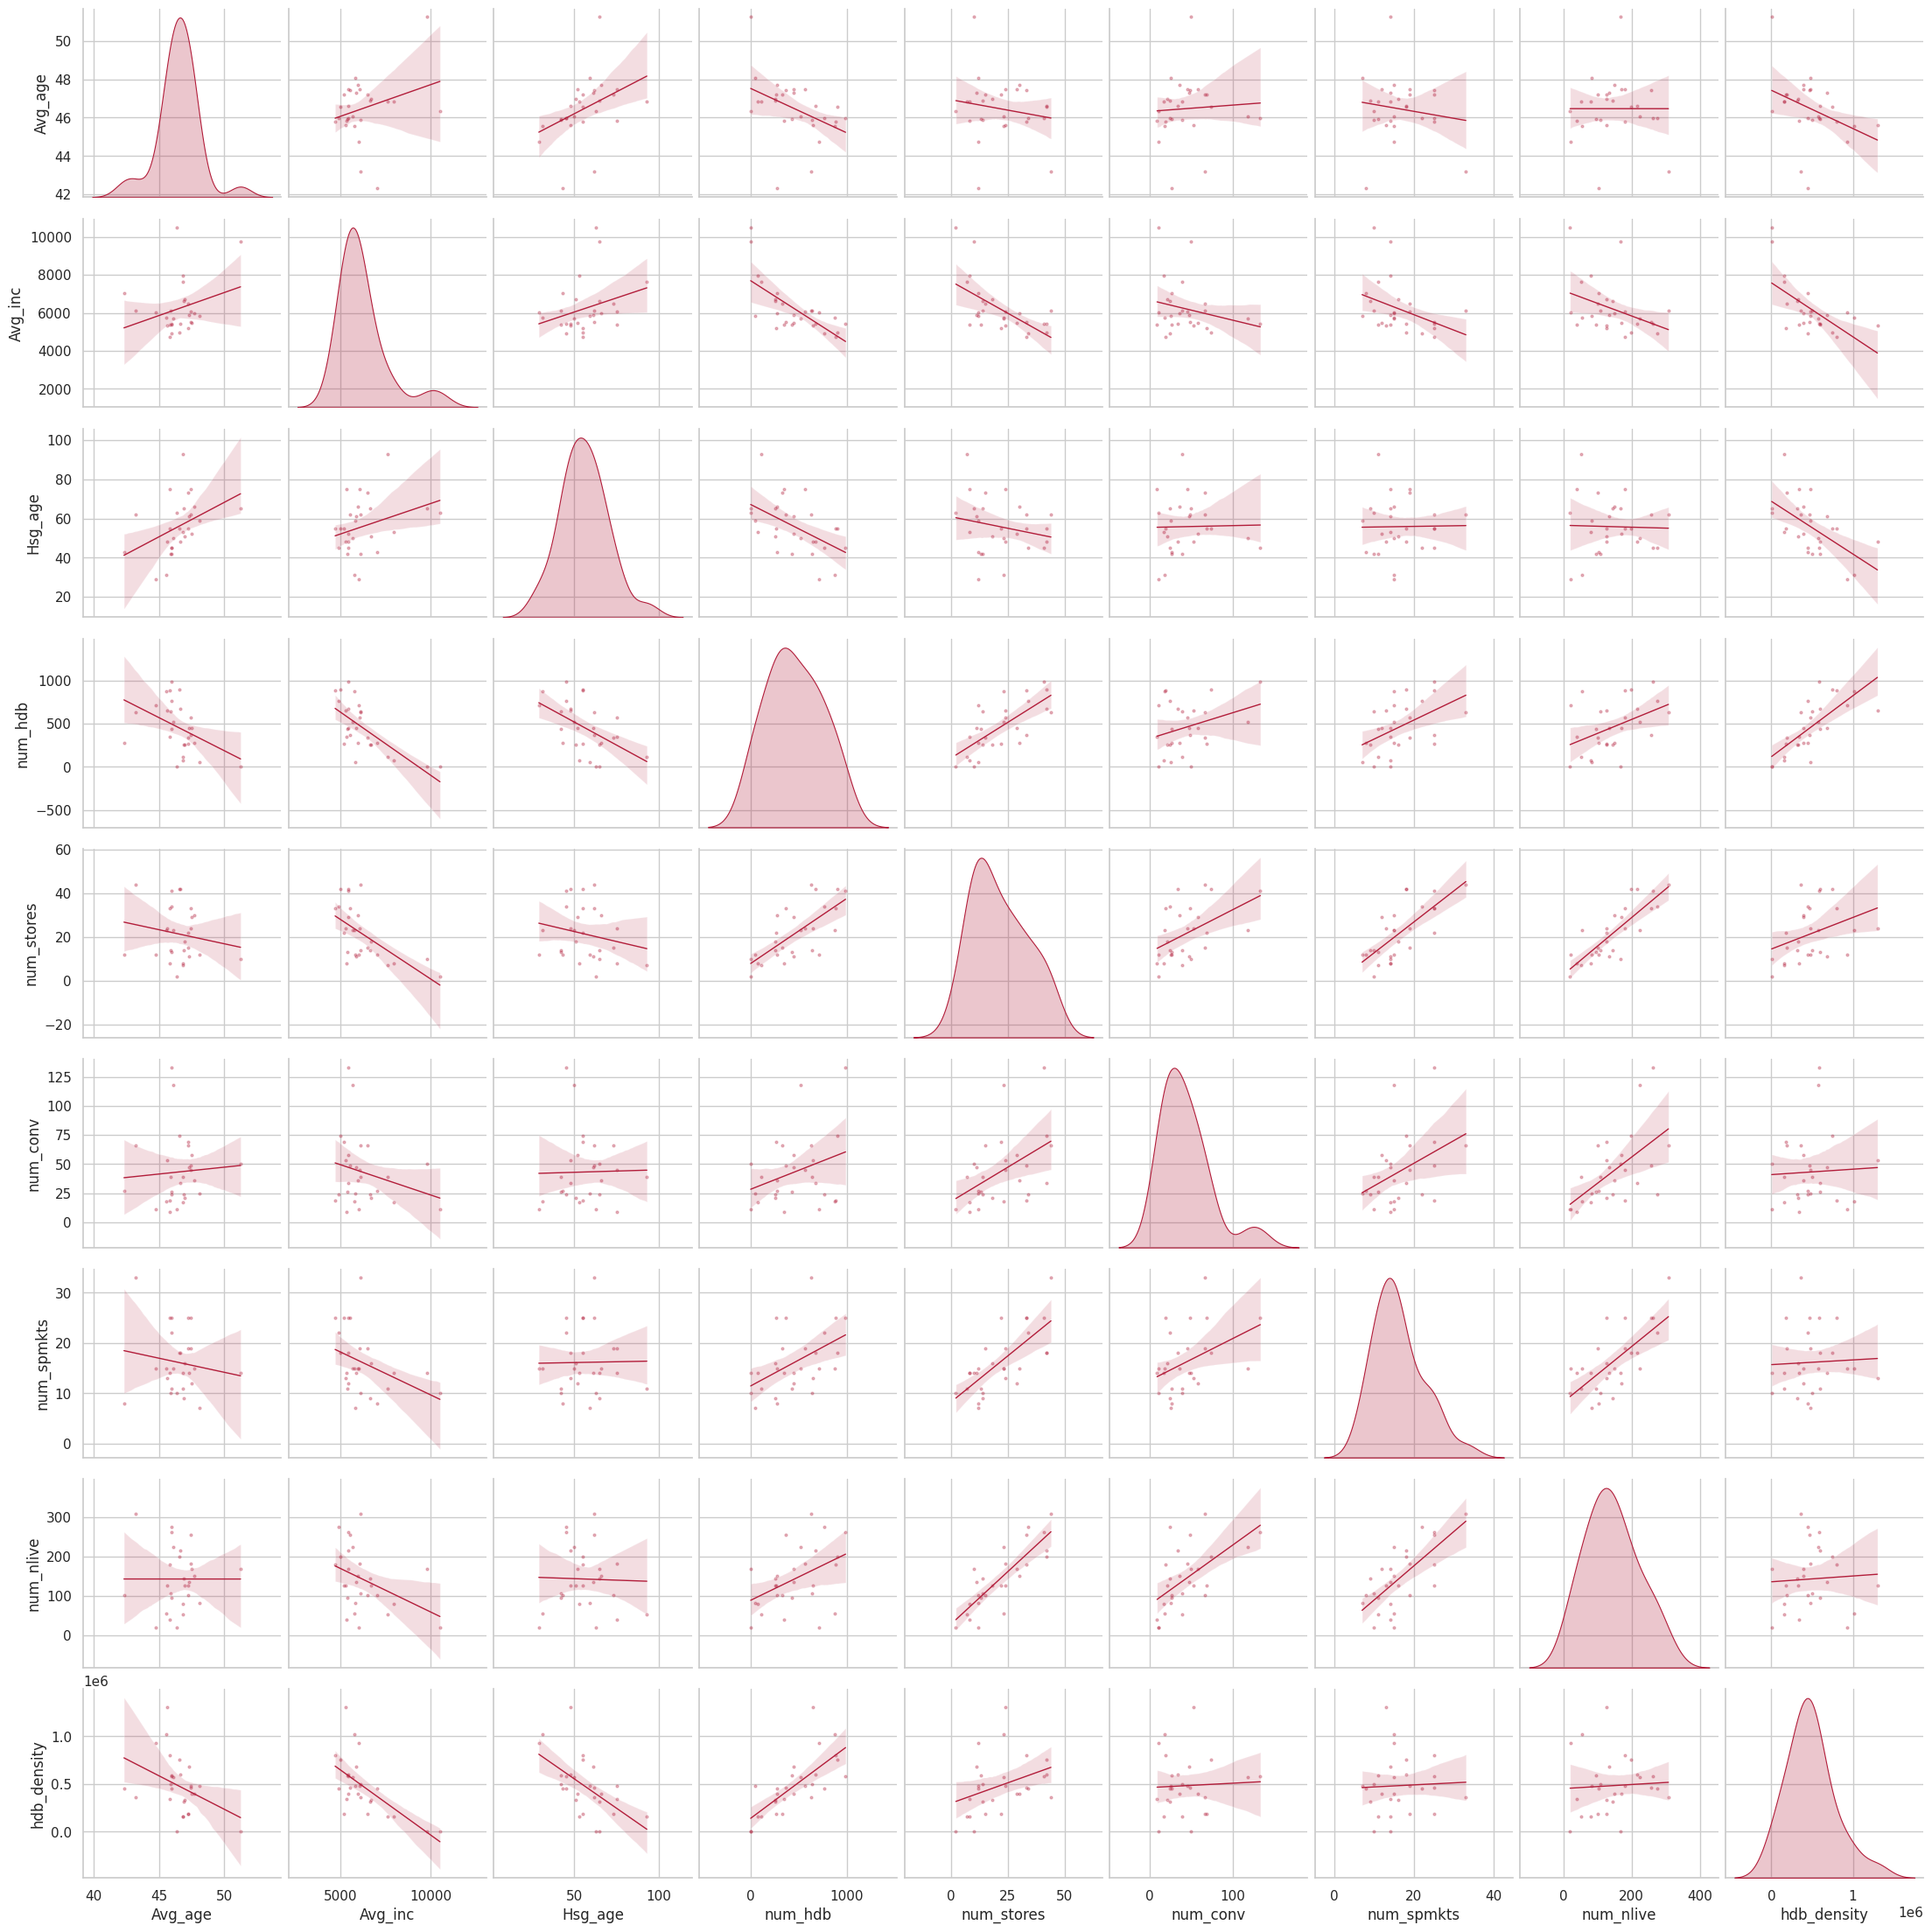

In [54]:
_ = sns.pairplot(dem_mm_gdf[columns], kind='reg', diag_kind='kde',
                 plot_kws={'scatter_kws': {'s': 4, 'alpha': 0.3, 'color': '#b21d3a'},
                           'line_kws': {'color': '#b21d3a', 'linewidth': 1}},
                 diag_kws={'color': '#b21d3a', 'linewidth': 0.8}, height=2.5, aspect=1)

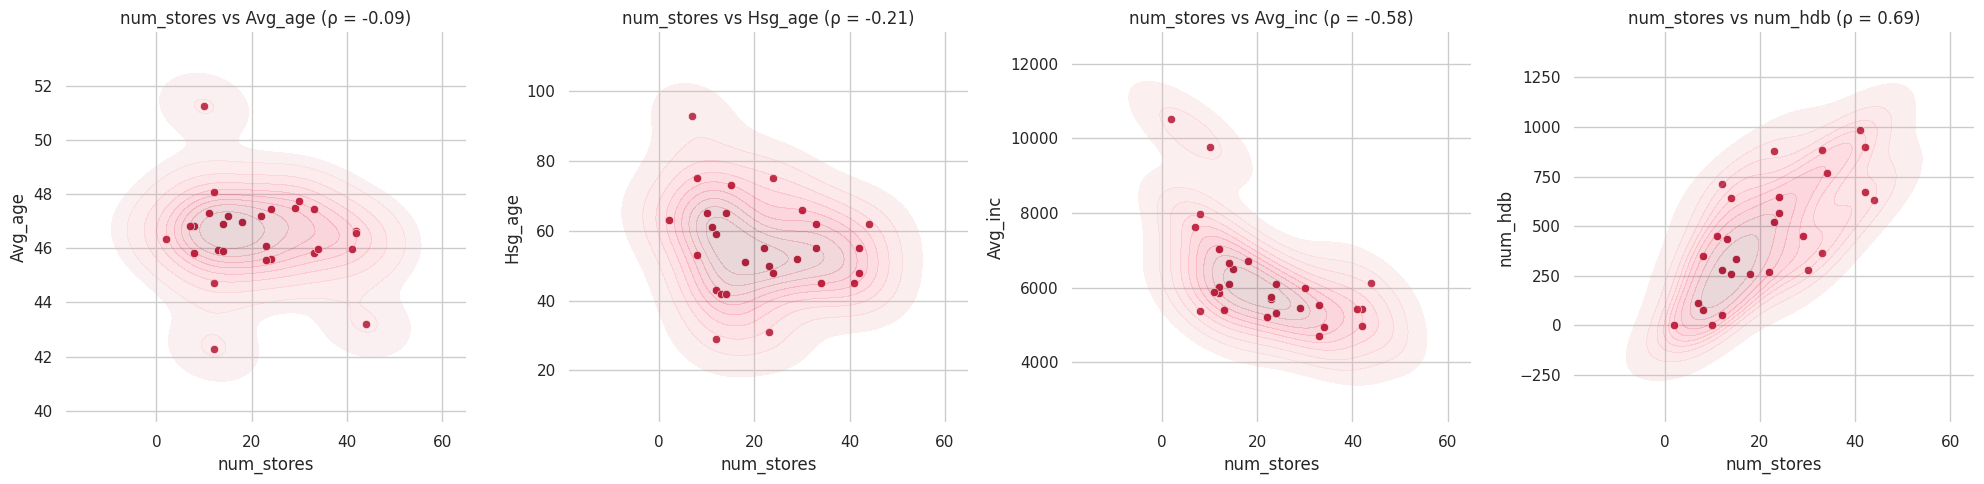

In [55]:
from scipy import stats

y_vars = ["Avg_age", "Hsg_age", "Avg_inc", "num_hdb"]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, y_var in enumerate(y_vars):
    spearman_corr = dem_mm_gdf[['num_stores', y_var]].corr(method='spearman')
    corr_value = round(spearman_corr.iloc[0, 1], 2)

    ax = axes[i]
    sns.scatterplot(x='num_stores', y=y_var, data=dem_mm_gdf, color="#b21d3a", ax=ax)

    sns.kdeplot(x='num_stores', y=y_var, data=dem_mm_gdf, color="#b21d3a", ax=ax, fill=True, alpha=0.2)

    ax.set_title(f"num_stores vs {y_var} (ρ = {corr_value})")
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()


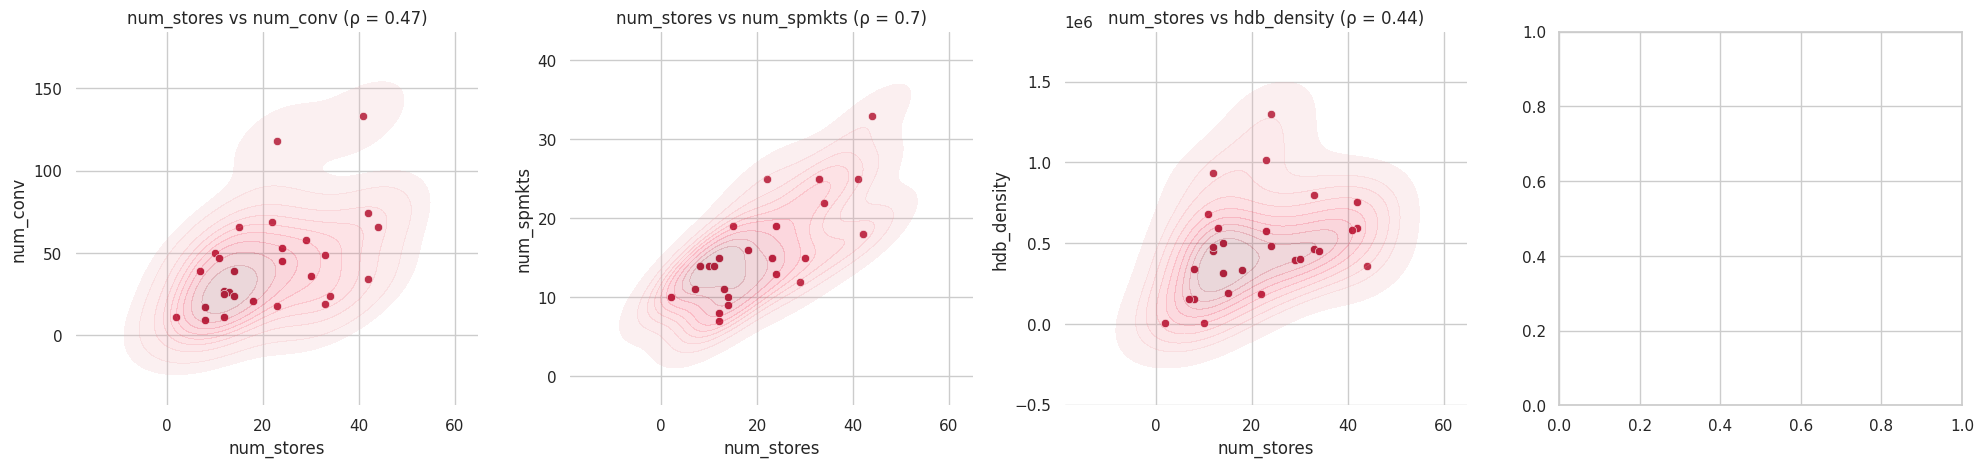

In [56]:
from scipy import stats

y_vars = ["num_conv", "num_spmkts", "hdb_density"]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, y_var in enumerate(y_vars):
    spearman_corr = dem_mm_gdf[['num_stores', y_var]].corr(method='spearman')
    corr_value = round(spearman_corr.iloc[0, 1], 2)
    #print(f"Kendall's Tau for {y_var}: {corr_value}")

    ax = axes[i]
    sns.scatterplot(x='num_stores', y=y_var, data=dem_mm_gdf, color="#b21d3a", ax=ax)

    sns.kdeplot(x='num_stores', y=y_var, data=dem_mm_gdf, color="#b21d3a", ax=ax, fill=True, alpha=0.2)

    ax.set_title(f"num_stores vs {y_var} (ρ = {corr_value})")
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()


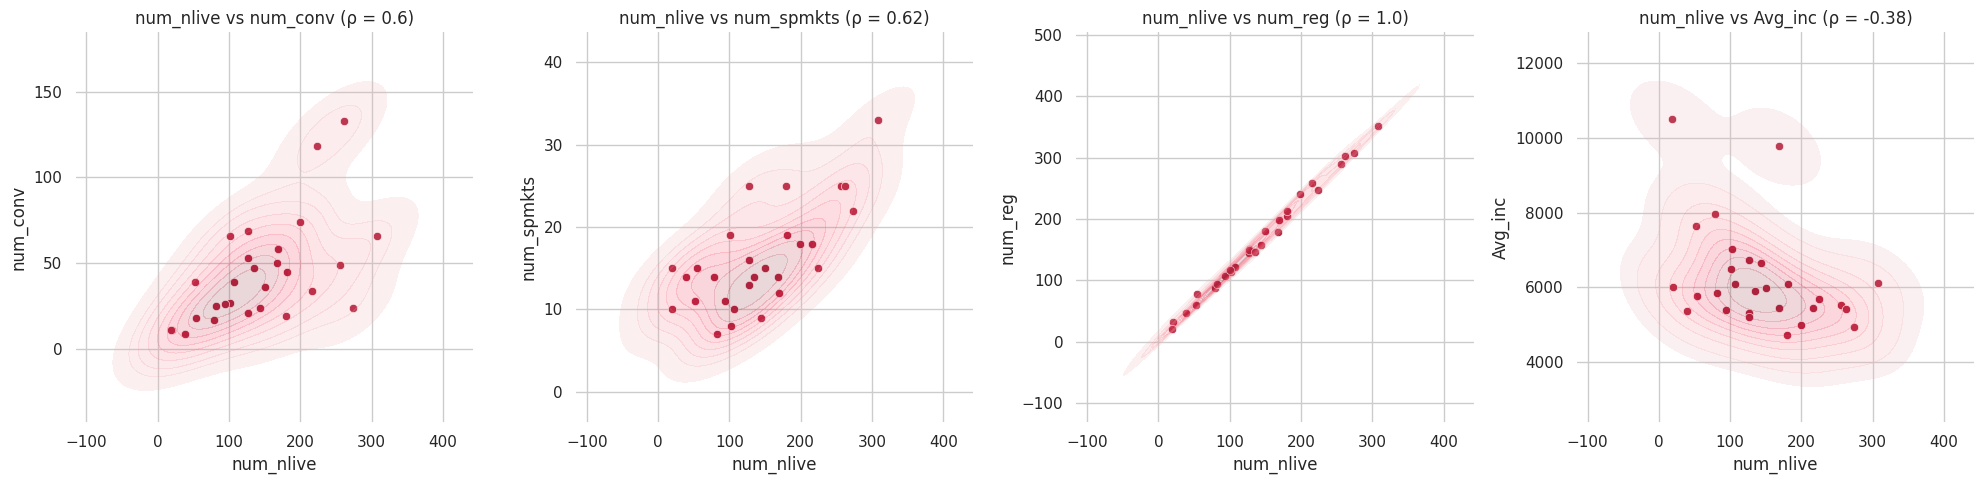

In [57]:
from scipy import stats

y_vars = ["num_conv", "num_spmkts", "num_reg", "Avg_inc"]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, y_var in enumerate(y_vars):
    spearman_corr = dem_mm_gdf[['num_nlive', y_var]].corr(method='spearman')
    corr_value = round(spearman_corr.iloc[0, 1], 2)
    #print(f"Kendall's Tau for {y_var}: {corr_value}")

    ax = axes[i]
    sns.scatterplot(x='num_nlive', y=y_var, data=dem_mm_gdf, color="#b21d3a", ax=ax)

    sns.kdeplot(x='num_nlive', y=y_var, data=dem_mm_gdf, color="#b21d3a", ax=ax, fill=True, alpha=0.2)

    ax.set_title(f"num_nlive vs {y_var} (ρ = {corr_value})")
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()


## Correlations between Number of Mamak Shops in an Area and Average Income and Number of Supermarkets

R² = 0.648 → About 65% of the variation in the number of mamak shops per area (*num_stores*) can be explained by the average income of residents (*Avg_inc*) and the number of supermarkets within the same vicinity(*num_spmkts*).


Adjusted R² = 0.620 → Because this is a similar value as the R², it shows that the model generates a reasonably well sample size.


F-statistic p-value is 2.17e-06 which means the overall regression model is statistically significant.

In [72]:
import statsmodels.api as sm

X = dem_mm_gdf[['Avg_inc', 'num_spmkts']]

y = dem_mm_gdf['num_stores']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             num_stores   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     22.98
Date:                Sat, 09 Aug 2025   Prob (F-statistic):           2.17e-06
Time:                        14:14:56   Log-Likelihood:                -94.593
No. Observations:                  28   AIC:                             195.2
Df Residuals:                      25   BIC:                             199.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.0180      9.580      2.611      0.0

The number of mamak shops per area has a high negative correlation with the average income of residents living in the same area and a positive correlation with the number of supermarkets in the same vicinity. The coefficient for *Avg_inc* is -0.0035, meaning for every $1000 increase, there's an approximate decrease of 3.5 shops around the same area.

However, surprisingly, for an additional supermarket, there would be about 1.13 more stores in the area (coefficient for *num_spmkts*). This could be due to the planning of neighbourhoods and HDB layouts. Large retail are often designed together with smaller retail on plans.